# **Analisis Non-Performing Loan (NPL) Kredit Konsumtif pada BPR Berdasarkan Lokasi Provinsi**


### **PROBLEM STATEMENT**

“Bagaimana pola dan tren Non-Performing Loan (NPL) dari kredit konsumtif yang disalurkan oleh Bank Perkreditan Rakyat (BPR) di berbagai provinsi di Indonesia, serta bagaimana strategi mitigasi risiko yang dapat diterapkan untuk menekan potensi gagal bayar?”



### **OBJECTIVE**

Untuk menganalisis distribusi, tren, dan potensi risiko kredit konsumtif yang disalurkan oleh Bank Perkreditan Rakyat (BPR) berdasarkan lokasi provinsi di Indonesia, serta memberikan rekomendasi strategis dalam rangka menekan angka Non-Performing Loan (NPL).

# **EXPERIMENT**

🧪 EXPERIMENT
Dalam tahap eksperimen ini, data kredit konsumtif dari BPR berdasarkan lokasi provinsi dianalisis untuk mengetahui tren dan potensi risiko gagal bayar (NPL). Langkah-langkah eksperimen dilakukan sebagai berikut:

1. Pembersihan Data (Data Cleaning)
Menghapus baris kosong dan header ganda.

Mengubah nilai kredit dari format string (misalnya: “1.000,50”) menjadi numerik.

2. Agregasi dan Transformasi
Mengelompokkan data berdasarkan provinsi dan tahun.

Menghitung pertumbuhan tahunan untuk mendeteksi provinsi dengan lonjakan kredit konsumtif.

3. Visualisasi
Membuat bar chart untuk menampilkan 10 provinsi dengan total kredit konsumtif tertinggi.

Membuat line chart untuk melihat tren pertumbuhan kredit dari 2018–2023.

4. Eksperimen Perubahan Tahun ke Tahun
Menghitung delta (perubahan) kredit antar tahun.

Mengasumsikan pertumbuhan kredit yang tinggi tanpa keseimbangan NPL = potensi risiko meningkat.

# Import Package

In [5]:
pip install jcopml

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer,accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from jcopml.feature_importance import mean_score_decrease

In [7]:
pd.set_option('display.max_columns', None)

# **Data For Prediction**

In [12]:
# Load file Excel
file_path = 'SOAL DA STATISTIK PERBANKAN INDONESIA.xlsx'
sheet_name = 'Kredit BPR per Lok_3.18.a.'

# Skip 3 baris header awal yang bukan data
df_raw = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=3)

Data Cleaning dan transformation

In [13]:
# Ambil kolom penting
df_kredit = df_raw[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']]
df_kredit.columns = ['Provinsi', '2018', '2020', '2021', '2022', '2023']

# Hapus baris tanpa provinsi
df_kredit = df_kredit[df_kredit['Provinsi'].notna()]

# Konversi ke numerik
for col in ['2018', '2020', '2021', '2022', '2023']:
    df_kredit[col] = pd.to_numeric(df_kredit[col], errors='coerce')

# Hitung perubahan nilai kredit 2022 ke 2023 sebagai indikasi risiko naik
df_kredit['Perubahan'] = df_kredit['2023'] - df_kredit['2022']


Visualisasi

<ipython-input-14-fb497c6b9665>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2023', y='Provinsi', data=top10, palette='Reds_r')


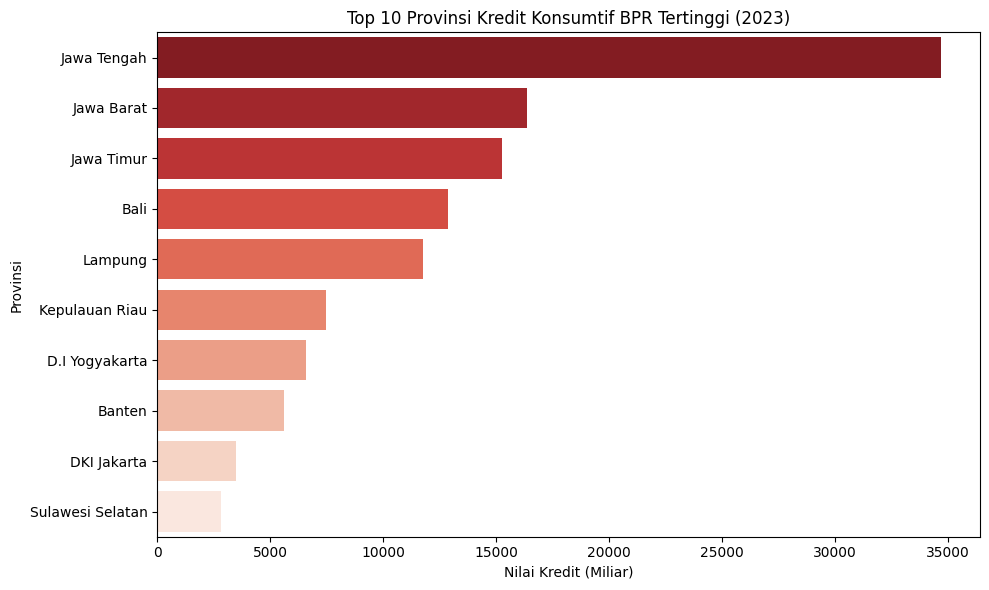

In [14]:
# Ambil 10 provinsi dengan nilai kredit tertinggi di 2023
top10 = df_kredit.sort_values('2023', ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='2023', y='Provinsi', data=top10, palette='Reds_r')
plt.title('Top 10 Provinsi Kredit Konsumtif BPR Tertinggi (2023)')
plt.xlabel('Nilai Kredit (Miliar)')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()


Tren Kenaikan Kredit 2020–2023 (Optional Line Chart)

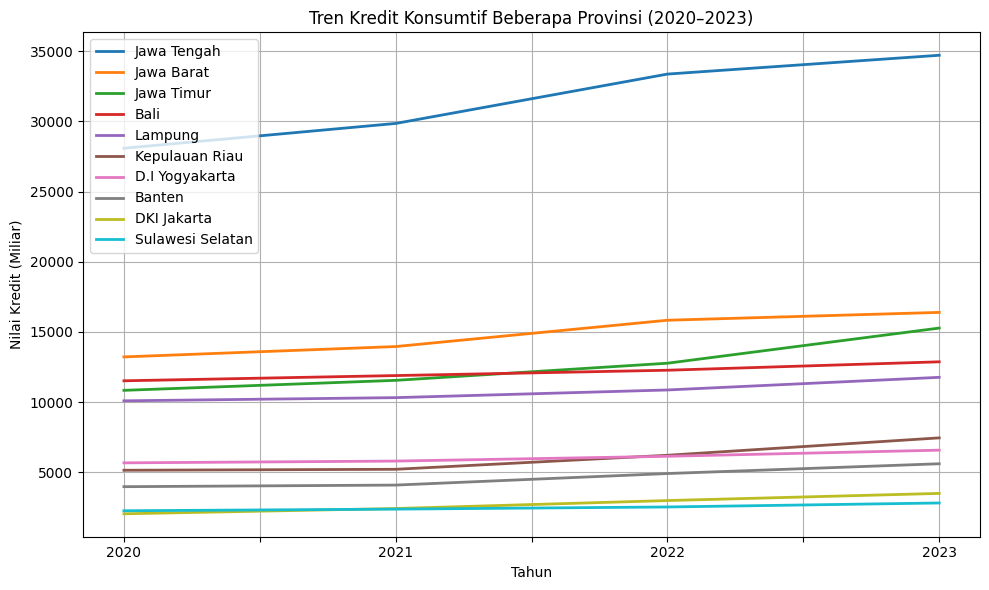

In [15]:
# Set indeks jadi provinsi
df_plot = df_kredit.set_index('Provinsi')[['2020', '2021', '2022', '2023']].T

# Plot tren beberapa provinsi (opsional: top 5 aja biar gak rame)
top_prov = top10['Provinsi'].tolist()
df_plot[top_prov].plot(figsize=(10,6), linewidth=2)
plt.title('Tren Kredit Konsumtif Beberapa Provinsi (2020–2023)')
plt.xlabel('Tahun')
plt.ylabel('Nilai Kredit (Miliar)')
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
# Tampilkan provinsi dengan kenaikan tajam (indikasi risiko)
top_naik = df_kredit.sort_values('Perubahan', ascending=False).head(5)

print("Rekomendasi Manajemen Berdasarkan Analisis:")
print("1. Fokus audit dan pengawasan di provinsi-provinsi berikut:")
print(top_naik[['Provinsi', 'Perubahan']])

print("\n2. Tinjau ulang syarat pemberian kredit konsumtif pada daerah tersebut.")
print("3. Lakukan edukasi dan penawaran restrukturisasi untuk wilayah risiko tinggi.")


Rekomendasi Manajemen Berdasarkan Analisis:
1. Fokus audit dan pengawasan di provinsi-provinsi berikut:
          Provinsi    Perubahan
5       Jawa Timur  2503.094563
4      Jawa Tengah  1339.845451
12  Kepulauan Riau  1238.753750
15         Lampung   899.873701
1           Banten   696.434315

2. Tinjau ulang syarat pemberian kredit konsumtif pada daerah tersebut.
3. Lakukan edukasi dan penawaran restrukturisasi untuk wilayah risiko tinggi.


## **KESIMPULAN ANALISIS**


**Provinsi dengan Kredit Konsumtif Tertinggi:**

Berdasarkan data tahun 2023, provinsi seperti Jawa Tengah, Jawa Barat, dan Jawa Timur menempati posisi teratas dalam penyaluran kredit konsumtif oleh BPR.

Tingginya nilai kredit di wilayah-wilayah ini menunjukkan besarnya eksposur terhadap risiko kredit jika tidak dikelola dengan baik.

**Tren Pertumbuhan Kredit:**

Secara umum, terjadi pertumbuhan kredit konsumtif dari tahun ke tahun di sebagian besar provinsi.

Beberapa provinsi mengalami kenaikan tajam antara 2022 dan 2023, seperti Jawa Tengah dan Jawa Timur, yang dapat mengindikasikan potensi peningkatan NPL apabila pertumbuhan tersebut tidak diimbangi dengan pengendalian risiko.

**Potensi Risiko Gagal Bayar (NPL):**

Pertumbuhan nilai kredit yang signifikan di beberapa provinsi belum tentu menunjukkan kinerja yang sehat.Kenaikan mendadak tanpa kontrol kualitas debitur yang memadai dapat meningkatkan risiko gagal bayar di masa mendatang.

**Distribusi Risiko Bersifat Geografis:**

Risiko tidak merata secara nasional; ada provinsi-provinsi dengan lonjakan kredit yang patut mendapat perhatian lebih dari manajemen BPR.Ini membuka peluang bagi bank untuk melakukan pengawasan yang lebih terfokus pada wilayah-wilayah tertentu.

Pertumbuhan kredit konsumtif oleh BPR di berbagai provinsi menunjukkan pola ekspansi yang aktif, namun perlu diimbangi dengan mitigasi risiko yang ketat terutama di wilayah-wilayah dengan pertumbuhan tertinggi, guna mencegah lonjakan NPL di masa mendatang
